In [5]:
method_name = 'mpc'
data_dir = '/Volumes/My Passport for Mac/cnn/data_update/with_precip/precip_data/results/decomposition/'
deco_file = data_dir + 'deco_bs_' + method_name + '_JAS.txt'
np.genfromtxt(deco_file)

ValueError: Some errors were detected !
    Line #4 (got 2 columns instead of 3)

In [26]:
import pandas as pd

# File path
file_path = '/mnt/data/deco_bs_cnn_JAS.txt'

# Reading the file
data = pd.read_csv(deco_file, sep=" ", header=None, engine='python', skipinitialspace=True)
data.columns = ["Metric", "Value"]  # Assigning column names
data["Metric"] = data["Metric"].str.strip('"')  # Remove quotes around Metric names

print(data)

  Metric     Value
0   MSC   0.002608
1   DSC   0.006720
2   UNC   0.167732
3     BS  0.163620


In [39]:
data = pd.read_csv(deco_file, sep=" ", header=None, engine='python', skipinitialspace=True)
data

,0,1
0,MSC,0.002608
1,DSC,0.006720
2,UNC,0.167732
3,BS,0.163620


In [40]:
data.iloc[0, 1]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [20]:
np.genfromtxt(deco_file)

ValueError: Some errors were detected !
    Line #4 (got 2 columns instead of 3)

In [41]:
methods = ['mpc', 'ecmwf' , 'ecmwf_pp', 'hres', 'logit_base', 'logit_full','cnn', 'hybrid']
data_dir = '/Volumes/My Passport for Mac/cnn/data_update/with_precip/precip_data/results/decomposition/'
methods_msc = np.zeros(len(methods))
methods_dsc = np.zeros(len(methods))
methods_unc = np.zeros(len(methods))
methods_bs = np.zeros(len(methods))
k = 0
for method_name in methods:
  deco_file = data_dir + 'deco_bs_' + method_name + '_JAS.txt'
  data = pd.read_csv(deco_file, sep=" ", header=None, engine='python', skipinitialspace=True)
  
  #X <- read.table(paste(deco_path, "log_scores.txt", sep=""))$V2
  methods_msc[k] = data.iloc[0, 1]
  methods_dsc[k] = data.iloc[1, 1]
  methods_unc[k] = data.iloc[2, 1]
  methods_bs[k] = data.iloc[3, 1]
  k = k+1

In [74]:
iso.iterrows()

<generator object DataFrame.iterrows at 0x7ff1009e5ba0>

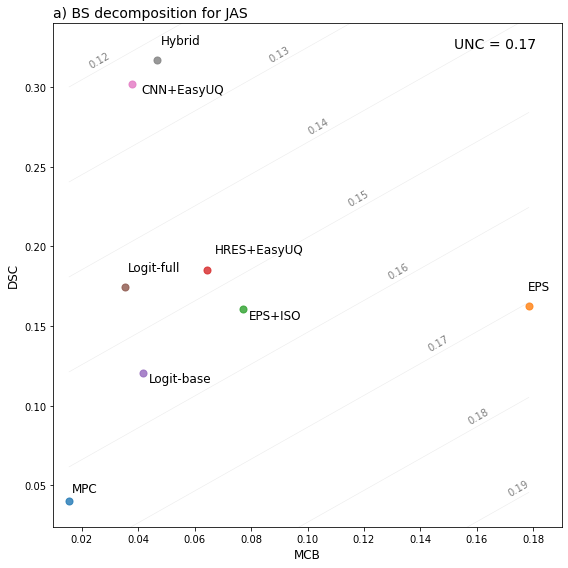

In [145]:
methods_name = ['MPC', 'EPS', 'EPS+ISO', 'HRES+EasyUQ', 'Logit-base', 'Logit-full', 'CNN+EasyUQ', 'Hybrid']

unc = methods_unc[0]
df_scores = pd.DataFrame({
    "models": methods_name,
    "msc": methods_msc / unc,
    "dsc": methods_dsc / unc
})

unc_str = np.round(methods_unc[0], 3)
# Define isolines
crps_isolines = np.array([0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])
intercepts = (unc - crps_isolines) / unc
iso = pd.DataFrame({"intercept": intercepts, "slope": 1, "crps_iso": crps_isolines})

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Add isolines
# Determine dynamic x and y limits
x_min, x_max = df_scores["msc"].min(), df_scores["msc"].max()
y_min, y_max = df_scores["dsc"].min(), df_scores["dsc"].max()

# Define the full horizontal range of the figure
x_range = np.linspace(x_min, x_max, 500)

# Plot isolines across the entire horizontal range
for _, row in iso.iterrows():
    y_vals = row["slope"] * x_range + row["intercept"]
    ax.plot(x_range, y_vals, color="lightgray", alpha=0.5, linewidth=0.5)

    # Determine midpoint of the isoline for label placement
    x_mid = (x_min + x_max) / 2
    y_mid = row["slope"] * x_mid + row["intercept"]

    # Convert to degrees for labeling
    angle_deg = 30#np.degrees(angle)  # Convert radians to degrees for label rotation

 
    if row['crps_iso'] == 0.12:
        shift_distance = -0.1
    else:
        shift_distance = (row['crps_iso']-0.12)-0.02+ (row['crps_iso']-0.13)#+(row['crps_iso']-0.12)*0.01
        
    x_label = x_mid + shift_distance * np.cos(angle)  # Apply shift along the slope direction
    y_label = y_mid + shift_distance * np.sin(angle)
    ax.text(
            x_label, 
            y_label, 
            f"{row['crps_iso']:.2f}", 
            fontsize=10, 
            color="gray", 
            ha="center", 
            va="bottom",  # Position label above the isoline
            rotation=angle_deg  # Rotate label to align with isoline in degrees
        )


# Scatter plot and annotations
texts = []
for _, row in df_scores.iterrows():
    ax.scatter(row['msc'], row['dsc'], label=row['models'], s=50, alpha=0.8)
    texts.append(ax.text(row['msc'], row['dsc'], row['models'], fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# Annotations and appearance
ax.set_xlabel("MCB", fontsize=12)
ax.set_ylabel("DSC", fontsize=12)
ax.set_title("a) BS decomposition for JAS", fontsize=14, loc='left')
ax.text(0.95, 0.95, f"UNC = {unc:.2f}", transform=ax.transAxes, fontsize=14, ha='right')

# Final adjustments
ax.set_xlim(0.01, 0.19)
ax.set_ylim(0.024,0.34)

#ax.set_aspect('equal', 'box')
ax.grid(False)
plt.tight_layout()
plt.show()
